> Autor: Fabian Massotto

---

## Objetivo
Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en images a partir del template.

1. Obtener una detección del logo en cada imagen sin falsos positivos.
2. Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1.
3. Generalizar el algoritmo del item 2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Función para mostrar imágenes
def print_image(img):
    plt.figure(1)
    plt.imshow(img)
    plt.show()

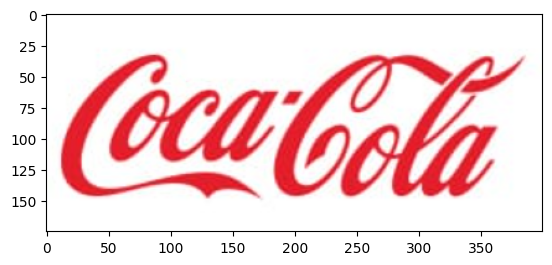

In [10]:
# Cargo la imagen que se va a utilizar como template
template = cv.cvtColor(cv.imread('template/pattern.png'), cv.COLOR_BGR2RGB)

print_image(template)

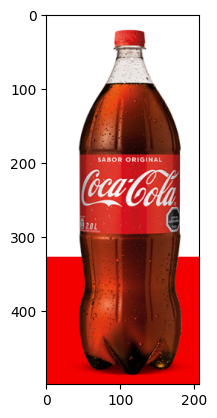

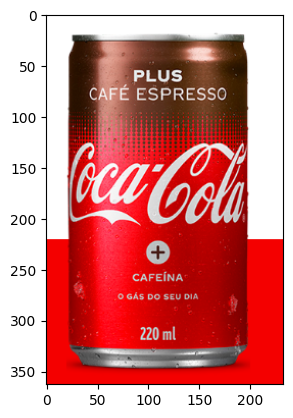

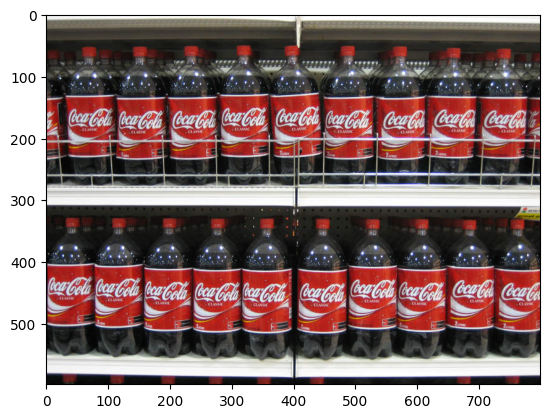

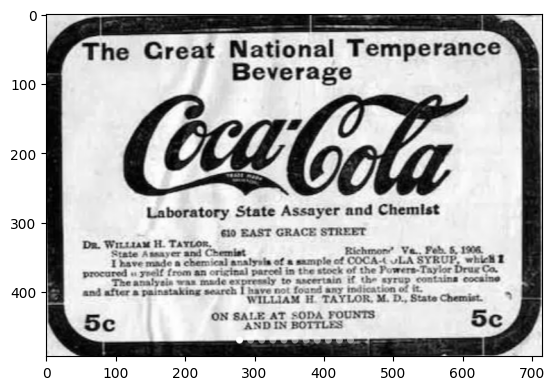

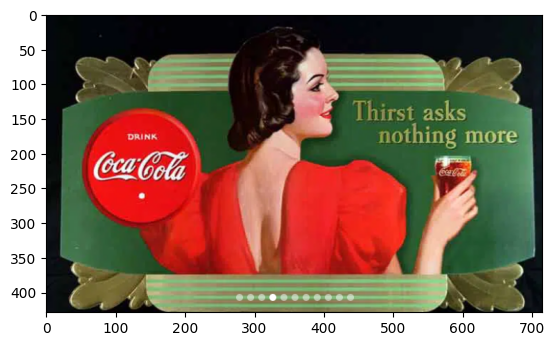

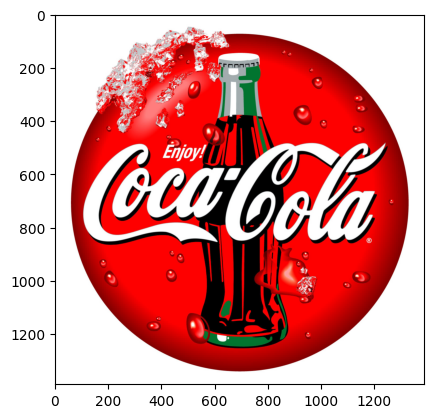

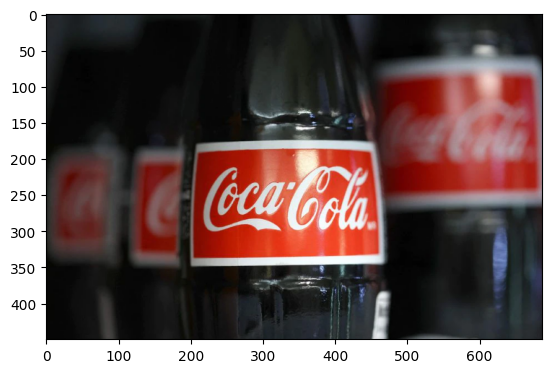

In [4]:
# Cargo las imágenes donde queremos encontrar el logo
files = ['coca_logo_1.png', 'coca_logo_2.png', 'coca_multi.png', 'coca_retro_1.png', 'coca_retro_2.png', 'COCA-COLA-LOGO.jpg', 'logo_1.png']
images = []

for file in files:
    img = cv.cvtColor(cv.imread(f'images/{file}'), cv.COLOR_BGR2RGB)
    print_image(img)
    images.append(img)

In [50]:
# Función para extraer los bordes de una imagen
def get_borders(img):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_borders = cv.Laplacian(cv.GaussianBlur(img_gray,(3,3),0), cv.CV_8U) 
    return img_borders

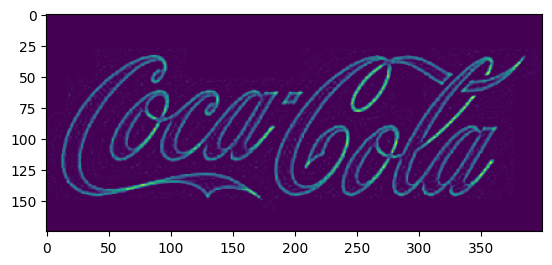

In [51]:
print_image(get_borders(template))

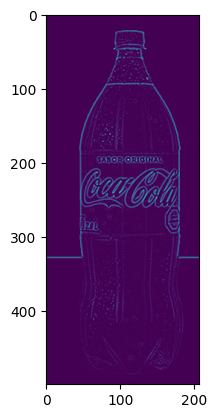

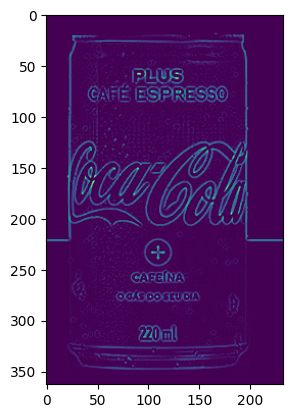

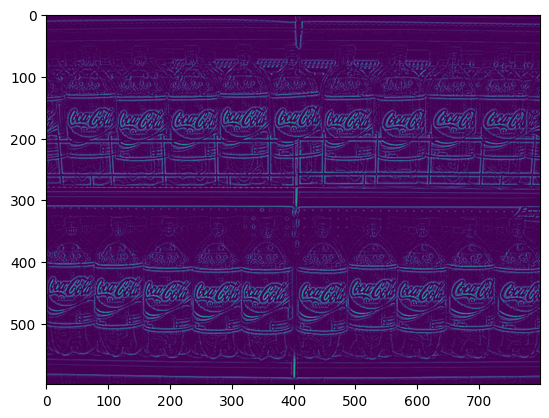

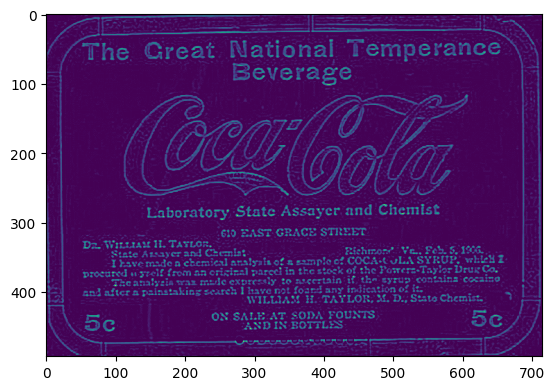

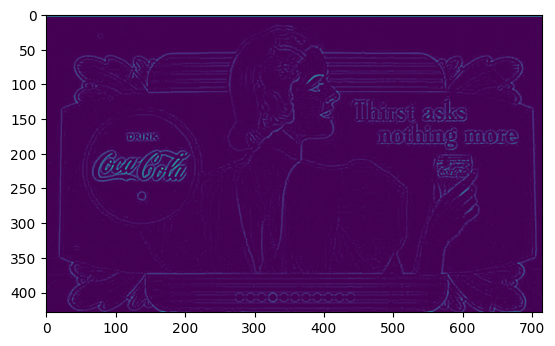

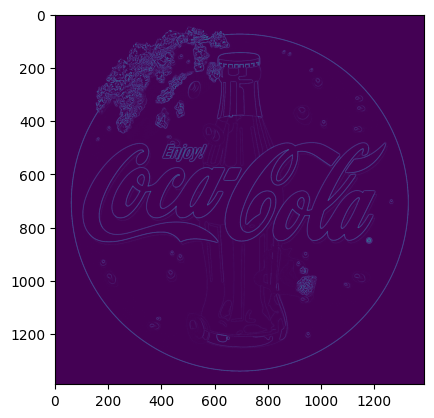

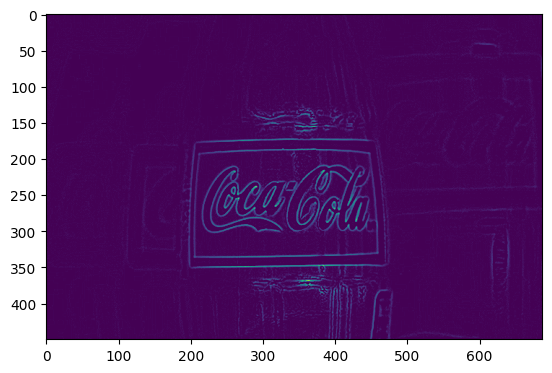

In [52]:
for img in images:
    print_image(get_borders(img))

In [81]:
# Función para encontrar el template en una imagen
def match_template(target, template, template_size_modifier):
    img_salida = target.copy()

    # Escalo el template
    template_resized = cv.resize(template, None, fx=template_size_modifier, fy=template_size_modifier)

    # Dimensiones del template escalado
    w_template = template_resized.shape[1]
    h_template = template_resized.shape[0]

    # Obtengo los bordes
    target_borders = get_borders(target)
    template_borders = get_borders(template_resized)
       
    # Aplico template matching. Como ya pre-procese las imágenes para obtener los bordes, utilizo el coeficiente de correlación.
    res = cv.matchTemplate(target_borders, template_borders, cv.TM_CCORR)

    # Encontramos los valores máximos y mínimos
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # Marcamos el lugar donde encontramos el template
    top_left = max_loc
    bottom_right = (top_left[0] + w_template, top_left[1] + h_template)
    cv.rectangle(img_salida, top_left, bottom_right, (0,255,0), 2)

    return img_salida

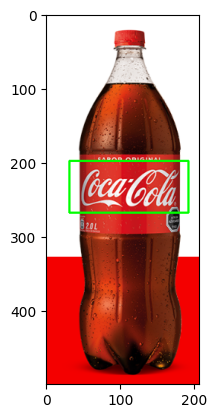

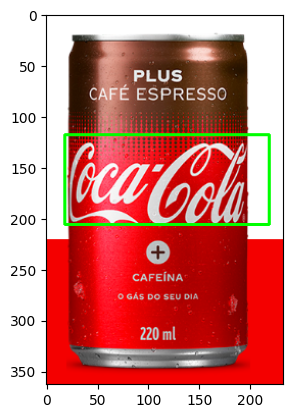

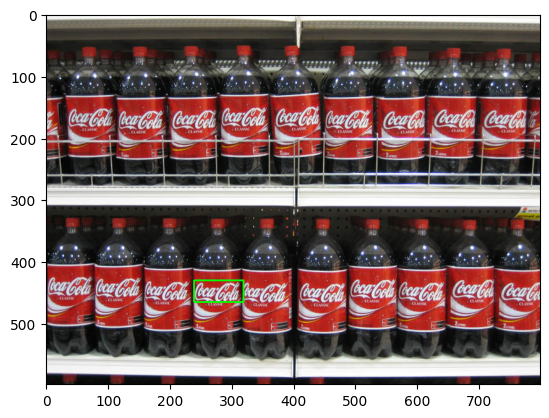

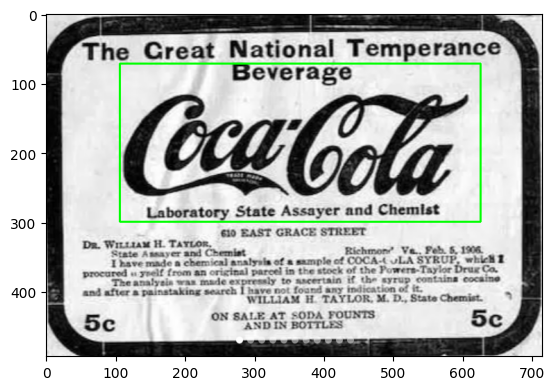

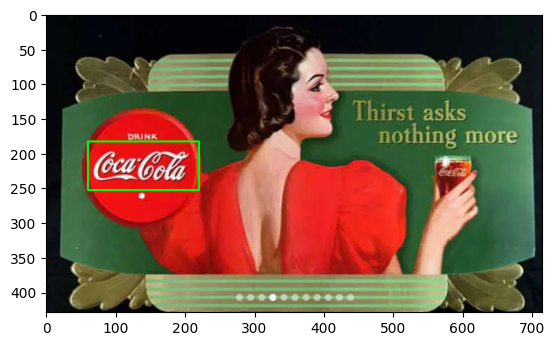

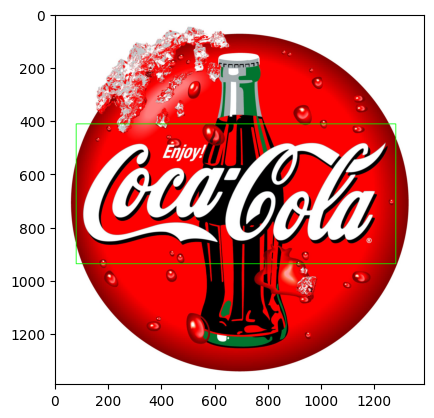

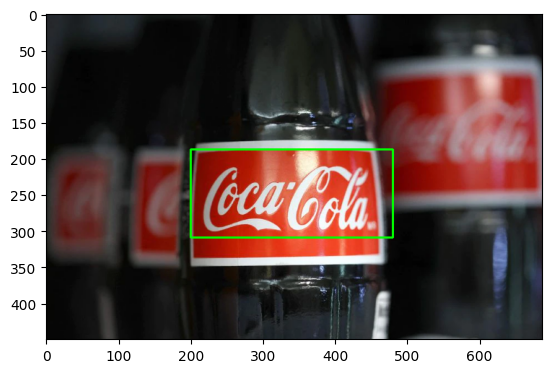

In [101]:
template_size_modifiers = [0.4, 0.5, 0.2, 1.3, 0.4, 3.0, 0.7]

for i, img in enumerate(images):
    print_image(match_template(img, template, template_size_modifiers[i]))